In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!pip install ultralytics

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 4.4 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-mfvzazhh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-mfvzazhh
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=bf2831d90188b0c9b09b2014bee2bc778b21b0056da92cfab3627d0697702c69
  Stored in directory: /tmp/pip-ephem-wheel-cache-ni6sdhtl/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-02-06 08:34:14--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.11, 3.162.163.19, 3.162.1

In [6]:
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.7/78.2 GB disk)


In [7]:
infer = YOLO("/content/drive/MyDrive/pvl/best.pt")

In [8]:
results = infer.predict("/content/drive/MyDrive/pvl/car10.png",save = True,save_txt=True)


image 1/1 /content/drive/MyDrive/pvl/car10.png: 384x640 19 Logoss, 96.2ms
Speed: 12.2ms preprocess, 96.2ms inference, 640.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [9]:
for result in results:
    boxes = result.boxes

bbox=boxes.xyxy.tolist()

bbox

[[463.85784912109375, 332.81475830078125, 583.4379272460938, 407.741943359375],
 [264.8796691894531, 505.5430908203125, 362.6934509277344, 617.0897216796875],
 [99.0966796875, 537.9149169921875, 174.03079223632812, 617.5391845703125],
 [371.7092590332031, 555.958984375, 478.1087951660156, 622.3253173828125],
 [484.9930419921875, 383.37152099609375, 534.520263671875, 440.42694091796875],
 [355.1305847167969, 623.61865234375, 467.4861755371094, 666.162109375],
 [963.2047119140625, 540.813720703125, 1065.6429443359375, 607.451416015625],
 [963.481201171875, 379.2552185058594, 1072.70068359375, 463.3447570800781],
 [911.4569091796875, 331.2951965332031, 1028.64892578125, 392.5097351074219],
 [678.4219970703125, 346.816650390625, 823.2152099609375, 380.29443359375],
 [1002.9009399414062, 597.198486328125, 1093.93212890625, 642.589599609375],
 [1027.806884765625, 630.3242797851562, 1122.461669921875, 674.8128051757812],
 [337.04095458984375, 659.9617919921875, 448.2410888671875, 698.81286621

In [10]:
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [11]:
image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/pvl/car10.png'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

1280 720


In [13]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [88]:
input_box = np.array(bbox[0])

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
print(masks)
# plt.figure(figsize=(11, 11))
# plt.imshow(image)
# # print(image.shape[1], image.shape[0])
# show_mask(masks[0], plt.gca())
# show_box(input_box, plt.gca())
# plt.axis('off')
# plt.show()

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


In [94]:
num_layers = 3
combined_mask = np.zeros_like(masks[0], dtype=np.bool)
kernel = np.ones((3, 3), np.uint8)  # You can adjust the kernel size based on your requirements

for i in range(19):
  input_box = np.array(bbox[i])

  mask, _, _ = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
  )
  mask = mask[0]
  mask_uint8 = mask.astype(np.uint8)
  for _ in range(num_layers):
    mask_dilated = cv2.dilate(mask_uint8, kernel, iterations=1)
    mask_uint8 = mask_dilated

    combined_mask = np.logical_or(combined_mask, mask_uint8.astype(np.bool))

im = Image.fromarray(combined_mask.astype(np.uint8) * 255)
im.save("/content/drive/MyDrive/pvl/car10_new.jpg")


<ipython-input-94-f712bf2b2507>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  combined_mask = np.zeros_like(masks[0], dtype=np.bool)
<ipython-input-94-f712bf2b2507>:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  combined_mask = np.logical_or(combined_mask, mask_uint8.astype(np.bool))


In [15]:
!pip install supervision
import supervision as sv

In [64]:
print(masks)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


In [65]:
#NOT USED

# Initialize an empty mask to store the combined result
combined_mask = np.zeros_like(masks[0], dtype=np.uint8)

# Iterate through each mask in the list
for mask in masks:
    # Convert the mask to uint8 type for bitwise_or operation
    mask_uint8 = mask.astype(np.uint8)
    # Perform bitwise_or operation to combine the current mask with the combined_mask
    combined_mask = cv2.bitwise_or(combined_mask, mask_uint8)

# Now combined_mask contains the final combined mask
# You can save it using PIL or OpenCV
im = Image.fromarray(combined_mask)
im.save("/content/drive/MyDrive/pvl/combined_mask.jpg")


In [66]:
# Define the number of layers
num_layers = 3

# Define the kernel for dilation
kernel = np.ones((3, 3), np.uint8)  # You can adjust the kernel size based on your requirements

for mask in masks:
  for _ in range(num_layers):
      masks_dilated = cv2.dilate(mask.astype(np.uint8), kernel, iterations=1)
      # Update the original mask with the dilated mask
      mask = np.logical_or(mask, masks_dilated)

<ipython-input-67-f65cb885664a>:1: DeprecationWarning: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.20.0`. Use `Color.RED` instead.
  box_annotator = sv.BoxAnnotator(color=sv.Color.red())
<ipython-input-67-f65cb885664a>:2: DeprecationWarning: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.20.0`. Use `Color.RED` instead.
  mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)


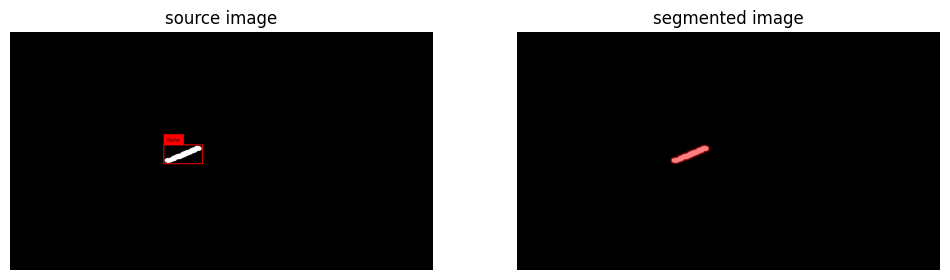

In [67]:
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

image_bgr = cv2.imread("/content/drive/MyDrive/pvl/car10.png")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=False)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [45]:
# sv.save_image(image=image, image_name="/a.png")
# detected img -> 794 × 455 pixels
# mask -> 950 × 543 pixels
# original img -> 1280 x 720 pixels

In [61]:
H, W, _ = image.shape
combined_mask = np.zeros((H, W), dtype=np.uint8)
for mask in masks:
  combined_mask = cv2.bitwise_or(combined_mask, mask.astype(np.uint8))
cv2.imwrite('/content/drive/MyDrive/pvl/output.jpeg', combined_mask)

True

In [68]:
from PIL import Image
im = Image.fromarray(masks[0])
im.save("/content/drive/MyDrive/pvl/car10.jpg")